## Reinforcement Learning

* Reinforcement Learning (RL) se ocupă cu rezolvarea problemelor de luare a deciziilor secvențiale (proces secvential de luare a deciziilor).

* Problemele de RL pot fi descrise ca un sistem format dintr-un agent și un environment(mediu). Agentul este entitatea care efectuează acțiuni, iar environment-ul reprezintă tot ceea ce există în afara agentului.

* Mediul generează informații despre starea sistemului, denumite stare (state). Agentul interacționează cu mediul prin observarea acestei stări și utilizarea informațiilor pentru a alege o acțiune. După ce agentul decide asupra unei acțiuni, mediul o primește, își schimbă starea și returnează agentului noua stare împreună cu o recompensă (reward).

* Acest proces (stare → acțiune → recompensă) definește un pas temporal (time step). Ciclul se repetă continuu până când mediul ajunge la o stare finală, de exemplu atunci când problema este rezolvată.

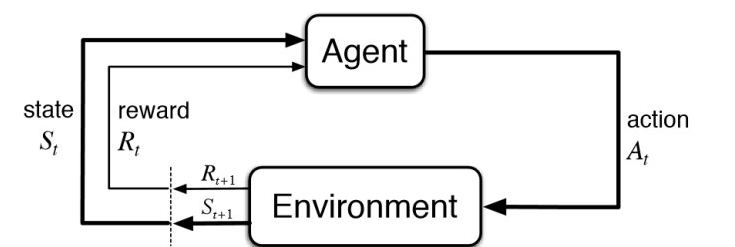

* Policy este o funcție care asociază fiecărei stări percepute ale mediului o acțiune pe care agentul trebuie să o întreprindă în acea stare (politica este funcția care generează acțiunile unui agent).


* Scopul unui agent într-un mediu RL este maximizarea sumei recompenselor primite. Pentru a realiza acest lucru, agentul încearcă să ia acțiuni optime prin trial and error.
## Pasi
 * Inițial, agentul efectuează acțiuni aleatorii.
 * Mediul oferă feedback sub formă de recompense.
 * Agentul folosește acest feedback pentru a îmbunătăți selecția acțiunilor și a învăța o politică mai bună.


* Interactiunea dintre agent si mediu se bazeaza pe 3 semnale: state - st, action - at, reward - rt. Tripletul (st, at, rt) - experienta
* Procesul de reinvatare poate continua la nesfârșit sau se poate termina atunci când se ajunge la o stare finală (terminal state) sau după un număr maxim de pași t = T.
* Intervalul dintre momentul initial si si momentul final se numeste episod.
* Traiectoria este secventa de experimente dintr-un episod.
* În general, un agent are nevoie de multe episoade pentru a învăța o politică eficientă în funcție de complexitatea problemei.

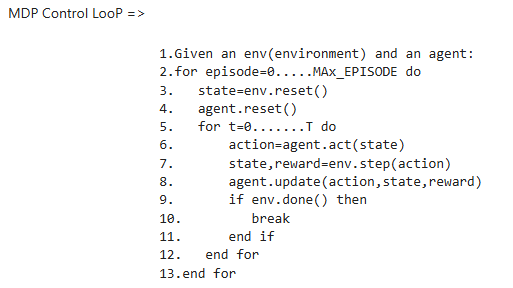

## Conceptele fundamentale ale învățării prin întărire
* Politica (Policy) π este o functie care asociaza unei actiuni (a) o stare (s).
* Functiile de valoare V(s) sau Q(s, a). V(s) estimează recompensa totală așteptată pornind din starea s și urmând politica π. Q(s, a) estimează recompensa totală așteptată dacă agentul se află în starea s, ia acțiunea a, și apoi urmează politica π.
* Modelul de mediu P(s′|s, a) care reprezintă funcția de tranziție a mediului, indicând probabilitatea de a ajunge în starea s′ după ce se ia acțiunea a în starea s.

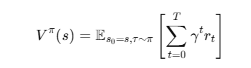
* Măsoară recompensa totală așteptată pentru un agent care începe în starea s și urmează politica π.
* γ este factorul de discount, care ajustează importanța recompenselor viitoare.

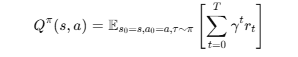
* Similar cu V dar aici agentul ia acțiunea a în starea s înainte de a urma politica π.

In [ ]:
!pip install gym[toy_text]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
env = gym.make('Taxi-v3', render_mode='rgb_array')

## Hyperparameters for Q-learning
alpha = 0.8 # Learning rate
gamma = 0.9 # Discount factor
eps = 1.0 # Rata de explorare
epsilon_decay = 0.99 # Decay of exploration rate
min_epsilon = 0.01
num_episodes = 1000
max_steps = 75



/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Initialize Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose an action based on eps
def choose_action(state):
  if np.random.uniform() < eps:
    return env.action_space.sample() # Choose a random action
  else:
    return np.argmax(Q[state]) # Choose the best action from Q-table


In [ ]:
# Training phase
for episode in range(num_episodes):
  state = env.reset()
  done = False

  for step in range(max_steps):
    action = choose_action(state)

    next_state, reward, done, info = env.step(action)

    # Update Q-value
    old_value = Q[state, action]
    next_max = np.max(Q[next_state, :])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

    state = next_state

    if done:
      break


  eps = max(min_epsilon, eps * epsilon_decay)


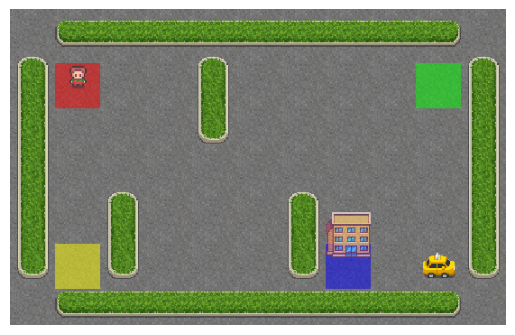

In [ ]:
for episode in range(5):
  state = env.reset()
  done = False
  score = 0

  for step in range(max_steps):
    # Render the environment
    frame = env.render()
    frame = np.squeeze(frame, axis=0)
    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    plt.show()

    action = np.argmax(Q[state, :])
    next_state, reward, done, info = env.step(action)
    state = next_state
    score += reward


    if done:
      print(f"Finished {episode + 1} with score: {score}")
      break
env.close()


In [ ]:
!pip install -U numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
